# Fall 2021 Data Science Intern Challenge 

## Question 1

**a) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.**

The mean order value is 3145.13. The calculation is correct, but I would recommend using a more robust, stable data metric like median. As we can see in the scatterplot, there are multiple extreme outliers (in the $700,000 range!) which is skewing the AOV. Calculating AOV when such large outliers exist can result in misleading data which can be difficult to analyze.

**b) What metric would you report for this dataset?**

In a distribution which has large outliers, I would recommend using median. The median is more robust and less sensitive to outliers in data. 

**c) What is its value?**

As shown below, the median is 284. This value is a better representation of our data than an AOV of $3145.13.

In [6]:
import pandas as pd

orders_data = '2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv'
orders_df = pd.read_csv(orders_data)

orders_df['order_amount'].mean()

3145.128

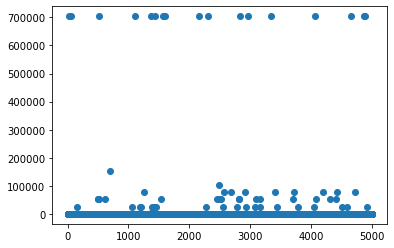

In [11]:
import matplotlib.pyplot as plot

plot.scatter(x=orders_df['order_id'], 
            y=orders_df['order_amount'])
plot.show()

In [18]:
orders_df['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

## Question 2

**a)**

``` sql
SELECT COUNT(OrderID)
FROM Orders 
LEFT JOIN Shippers ON Orders.ShipperID = Shippers.ShipperID 
WHERE Shippers.ShipperName = 'Speedy Express'
```

Answer: 54

**b)**

``` sql
SELECT TOP 1 Employees.LastName 
FROM Orders 
INNER JOIN Employees ON Orders.EmployeeID=Employees.EmployeeID 
GROUP BY Employees.LastName 
ORDER BY Count(Orders.OrderID) DESC;
```

Answer: Peacock

**c)**

``` sql
SELECT ProductName
FROM Products
LEFT JOIN OrderDetails
ON Products.ProductID = OrderDetails.ProductID 
LEFT JOIN Orders
ON OrderDetails.OrderID = Orders.OrderID
LEFT JOIN Customers
ON Orders.CustomerID = Customers.CustomerID
WHERE Country = 'Germany'
GROUP BY OrderDetails.ProductID
ORDER BY COUNT(*) DESC
LIMIT 1
```
Answer: Gorgonzola Telino